In [33]:
import pickle


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from category_encoders import OrdinalEncoder
from category_encoders import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

In [34]:
def wrangle(filename):
    # Read CSV file
    df = pd.read_csv(filename)
    
    #df['Purchase_DATE']= df['Purchase_DATE'].astype(float)
    
    #df["Purchase_DATE"] = df['Purchase_DATE'].str.replace('.', '', regex=False).astype(float)
    
    return df

In [35]:
#Load files into a pandas dataframe
df_train = wrangle(r"C:\Users\sanus\Desktop\certificate\New folder\Train.csv")
df_test = wrangle(r"C:\Users\sanus\Desktop\certificate\New folder\Test.csv")

In [36]:
print(df_train.info())
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   disrict               135493 non-null  float64
 1   client_id             135493 non-null  object 
 2   client_catg           135493 non-null  float64
 3   region                135493 non-null  float64
 4   target                135493 non-null  float64
 5   consommation_level_1  135493 non-null  int64  
 6   consommation_level_2  135493 non-null  int64  
 7   consommation_level_3  135493 non-null  int64  
 8   consommation_level_4  135493 non-null  int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 9.3+ MB
None


,disrict,client_id,client_catg,region,target,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4
0,60.0,train_Client_0,11.0,101.0,0.0,82,0,0,0
1,69.0,train_Client_1,11.0,107.0,0.0,1200,184,0,0
2,62.0,train_Client_10,11.0,301.0,0.0,123,0,0,0
3,69.0,train_Client_100,11.0,105.0,0.0,102,0,0,0
4,62.0,train_Client_1000,11.0,303.0,0.0,572,0,0,0


In [37]:
print(df_test.info())
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58069 entries, 0 to 58068
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   disrict               58069 non-null  float64
 1   client_id             58069 non-null  object 
 2   client_catg           58069 non-null  float64
 3   region                58069 non-null  float64
 4   consommation_level_1  58069 non-null  int64  
 5   consommation_level_2  58069 non-null  int64  
 6   consommation_level_3  58069 non-null  int64  
 7   consommation_level_4  58069 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 3.5+ MB
None


,disrict,client_id,client_catg,region,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4
0,62.0,test_Client_0,11.0,307.0,755,0,0,0
1,69.0,test_Client_1,11.0,103.0,1067,0,0,0
2,62.0,test_Client_10,11.0,310.0,0,0,0,0
3,60.0,test_Client_100,11.0,101.0,410,0,0,0
4,62.0,test_Client_1000,11.0,301.0,412,0,0,0


In [38]:
print(df_train.shape, df_test.shape)

(135493, 9) (58069, 8)


In [39]:
# Get a summary for all the numerical columns
df_train.describe()

,disrict,client_catg,region,target,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4
count,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000
mean,63.511222,11.512506,206.159809,0.055841,407.620180,106.184356,22.094758,44.375591
std,3.354400,4.423761,104.207044,0.229614,622.031021,748.387049,310.302435,638.236022
min,60.000000,11.000000,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.000000,11.000000,103.000000,0.000000,75.000000,0.000000,0.000000,0.000000
50%,62.000000,11.000000,107.000000,0.000000,267.000000,0.000000,0.000000,0.000000
75%,69.000000,11.000000,307.000000,0.000000,600.000000,0.000000,0.000000,0.000000
max,69.000000,51.000000,399.000000,1.000000,93385.000000,99398.000000,45360.000000,87776.000000


In [40]:
# Get a summary for all the numerical columns
df_test.describe()

,disrict,client_catg,region,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4
count,58069.000000,58069.000000,58069.000000,58069.000000,58069.000000,58069.000000,58069.000000
mean,63.510617,11.507224,206.018461,418.223200,161.819818,21.696964,76.162755
std,3.356708,4.395923,104.144028,549.941847,1334.770689,134.161581,1018.190137
min,60.000000,11.000000,101.000000,0.000000,0.000000,0.000000,0.000000
25%,62.000000,11.000000,103.000000,80.000000,0.000000,0.000000,0.000000
50%,62.000000,11.000000,107.000000,290.000000,0.000000,0.000000,0.000000
75%,69.000000,11.000000,307.000000,605.000000,0.000000,0.000000,0.000000
max,69.000000,51.000000,399.000000,22927.000000,99379.000000,4800.000000,57285.000000


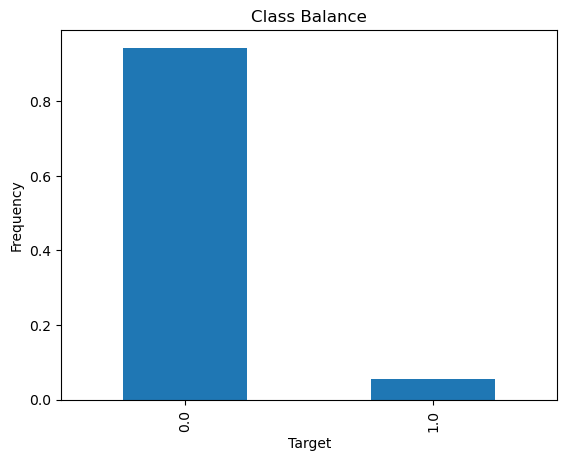

In [41]:
# Plot class balance
df_train["target"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="Target",
    ylabel="Frequency",
    title="Class Balance"
);

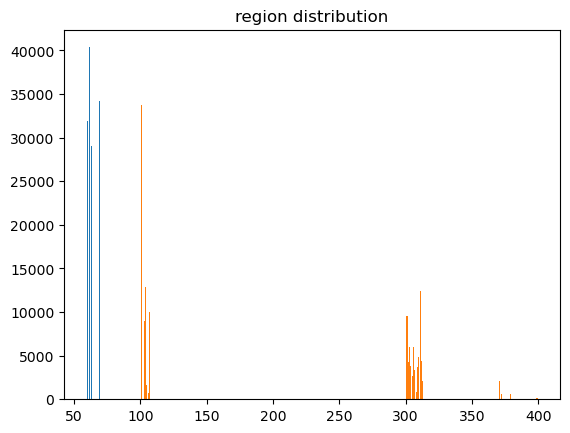

In [42]:
# Here's the code for that
for col in ['disrict','region']:
    region = df_train.groupby([col])['client_id'].count()
    plt.bar(x=region.index, height=region.values)
    plt.title(col+' distribution');

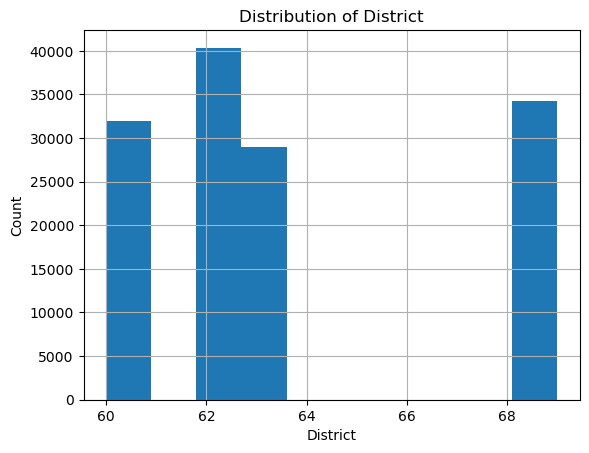

In [43]:
# Plot histogram of `District`
df_train["disrict"].hist()
plt.xlabel("District")
plt.ylabel("Count")
plt.title("Distribution of District");

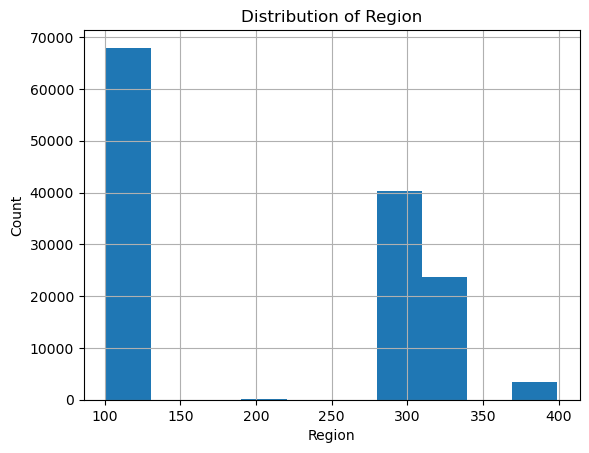

In [44]:
# Plot histogram of `Region`
df_train["region"].hist()
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Distribution of Region");

# First, you'll need to make your feature matrix X and your goal vector y. The word "target" itself is the target.

In [45]:
# split train data
Target = "target"
X = df_train.drop(columns=Target)
y = df_train[Target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (135493, 8)
y shape: (135493,)


# Make a bar graph displaying the value counts for the "Target" column. You want to compute the relative frequencies of the classes rather than the raw count, so make sure that the normalized option is set to True. This will allow you to determine the relative frequencies of the classes.


In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (121943, 8)
y_train shape: (121943,)
X_test shape: (13550, 8)
y_test shape: (13550,)


# Resample

#By randomly oversampling the training data, you can generate a new feature matrix denoted X_train_over, as well as a target vector denoted y_train_over.

In [47]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over.head()

(230300, 8)


,disrict,client_id,client_catg,region,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4
0,63.0,train_Client_35880,11.0,311.0,507,0,0,0
1,60.0,train_Client_16469,11.0,101.0,0,0,0,0
2,62.0,train_Client_45753,11.0,305.0,392,0,0,0
3,63.0,train_Client_105461,11.0,372.0,722,0,0,0
4,63.0,train_Client_59169,11.0,312.0,78,0,0,0


# Build Model

In [48]:
# Calculate the baseline accuracy score for your model.
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9443


# Iterate

#That is most certainly a helpful method for predicting the future; however, what if the model that we have constructed isn't the correct one? If there was some way that we could utilize more than one model at the same time, our forecast would be more reliable.

The results of an ensemble model are arrived at by first developing many models using random subsets of the same data, and then comparing the results of these models to arrive at a conclusion. In light of the fact that we made use of a decision tree in the prior exercise, we are going to construct an assembly of trees here. A random forest is the name given to this category of model.

In [49]:
#Create a pipeline named clf (short for "classifier") that contains a SimpleImputer transformer and a RandomForestClassifier predictor.
clf = make_pipeline(OrdinalEncoder(), SimpleImputer(), RandomForestClassifier(random_state=42))
print(clf)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


#Perform cross-validation with your classifier, using the over-sampled training data. We want five folds, so set cv to 5. We also want to speed up training, to set n_jobs to -1.

In [50]:
cv_acc_scores = cross_val_score(clf, X_train_over, y_train_over, cv=5, n_jobs=-1)
print(cv_acc_scores)

[1.         0.97616153 0.97542336 0.98458532 0.97787668]


#Create a dictionary with the range of hyperparameters that we want to evaluate for our classifier.

For the SimpleImputer, try both the "mean" and "median" strategies.
For the RandomForestClassifier, try max_depth settings between 10 and 50, by steps of 10.
Also for the RandomForestClassifier, try n_estimators settings between 25 and 100 by steps of 25.

In [51]:
params = {
    "simpleimputer__strategy": ["mean", "median"],
    "randomforestclassifier__n_estimators": range(25, 100, 25),
    "randomforestclassifier__max_depth": range(10, 50, 10)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

#Create a GridSearchCV named model that includes your classifier and hyperparameter grid. Be sure to use the same arguments for cv and n_jobs that you used above, and set verbose to 1.

In [52]:
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [53]:
# Train model
model.fit(X_train_under, y_train_under)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [55]:
#Extract the cross-validation results from model and load them into a DataFrame named cv_results.
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.220630,0.007768,0.017615,0.001452,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.5,0.500184,0.500184,0.499816,0.499816,0.5,0.000165,1
1,0.218727,0.016679,0.016968,0.001975,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.5,0.500184,0.500184,0.499816,0.499816,0.5,0.000165,1
2,0.370998,0.021119,0.023661,0.000882,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.5,0.500184,0.500184,0.499816,0.499816,0.5,0.000165,1
3,0.389437,0.021435,0.026558,0.005042,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.5,0.500184,0.500184,0.499816,0.499816,0.5,0.000165,1
4,0.532699,0.016902,0.033766,0.004583,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.5,0.500184,0.500184,0.499816,0.499816,0.5,0.000165,1
5,0.539887,0.035310,0.032521,0.001573,10,75,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.5,0.500184,0.500184,0.499816,0.499816,0.5,0.000165,1
6,0.208370,0.014988,0.020343,0.005756,20,25,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.5,0.500184,0.500184,0.499816,0.499816,0.5,0.000165,1
7,0.207823,0.005747,0.017476,0.000675,20,25,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.5,0.500184,0.500184,0.499816,0.499816,0.5,0.000165,1
8,0.383596,0.019720,0.024021,0.001022,20,50,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.5,0.500184,0.500184,0.499816,0.499816,0.5,0.000165,1
9,0.414429,0.010380,0.029770,0.005338,20,50,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.5,0.500184,0.500184,0.499816,0.499816,0.5,0.000165,1


#reate a mask for cv_results for rows where "param_randomforestclassifier__max_depth" equals 10. Then plot "param_randomforestclassifier__n_estimators" on the x-axis and "mean_fit_time" on the y-axis. Don't forget to label your axes and include a title.

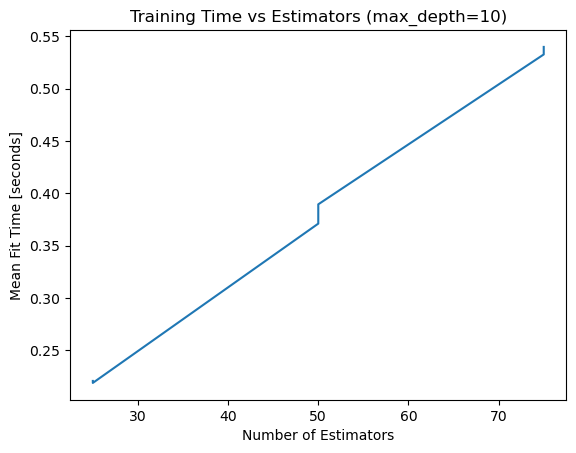

In [56]:
# Create mask
mask = cv_results["param_randomforestclassifier__max_depth"] == 10
# Plot fit time vs n_estimators
plt.plot(
    cv_results[mask]["param_randomforestclassifier__n_estimators"],
    cv_results[mask]["mean_fit_time"]
)
# Label axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

#Create a mask for cv_results for rows where "param_randomforestclassifier__n_estimators" equals 25. Then plot "param_randomforestclassifier__max_depth" on the x-axis and "mean_fit_time" on the y-axis. Don't forget to label your axes and include a title.

In [57]:
cv_results[mask][["mean_fit_time", "param_randomforestclassifier__max_depth", "param_simpleimputer__strategy"]]

,mean_fit_time,param_randomforestclassifier__max_depth,param_simpleimputer__strategy
0,0.220630,10,mean
1,0.218727,10,median
2,0.370998,10,mean
3,0.389437,10,median
4,0.532699,10,mean
5,0.539887,10,median


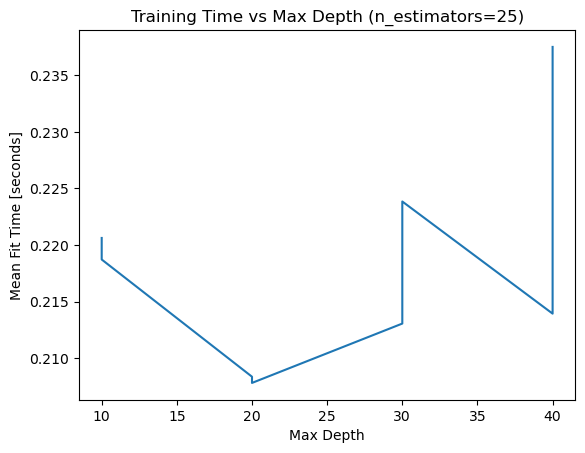

In [58]:
# Create mask
mask = cv_results["param_randomforestclassifier__n_estimators"] == 25
# Plot fit time vs max_depth
plt.plot(
    cv_results[mask]["param_randomforestclassifier__max_depth"],
    cv_results[mask]["mean_fit_time"]
)
# Label axes
plt.xlabel("Max Depth")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Max Depth (n_estimators=25)");

# Extract the best hyperparameters from model.

In [59]:
model.best_params_

{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__n_estimators': 25,
 'simpleimputer__strategy': 'mean'}

In [60]:
# Extract best hyperparameters
model.predict(X_train_over)

array([0., 0., 0., ..., 1., 1., 1.])

In [61]:
model.best_score_

0.5

# Evaluate

In [62]:
acc_train =  model.score(X_train, y_train)
acc_test = model.score(X_test, y_test) 

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.943


In [63]:
y_test.value_counts()

0.0    12777
1.0      773
Name: target, dtype: int64

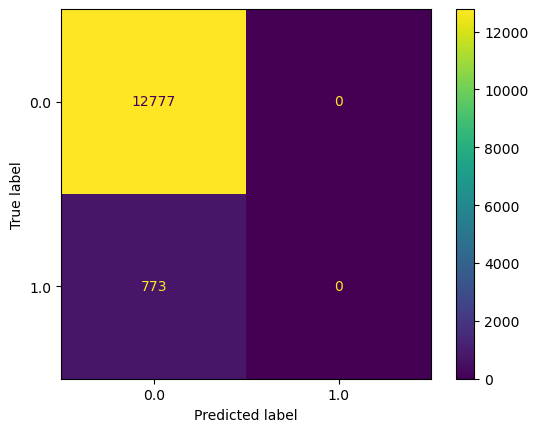

In [64]:
#Plot a confusion matrix that shows how your best model performs on your test set.
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

# Create a horizontal bar chart with the 10 most important features for your model.

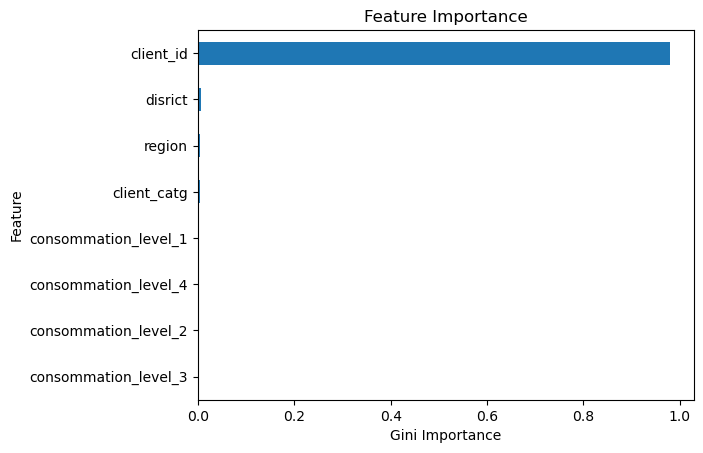

In [65]:
# Get feature names from training data
features = X_train_over.columns
# Extract importances from model
importances = model.best_estimator_.named_steps["randomforestclassifier"].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [66]:
#model makes a prediction
preds = model.predict(df_test)
# Convert it to a dataframe
preds = pd.DataFrame(preds)
#get a sample of the preds dataframe
preds.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [67]:
# Here we are converting the submission data to a dataframe
submission = pd.DataFrame({
        "client_id": df_test["client_id"],
        "target": preds[0]
    })

In [70]:
#here we are converting to a csv file
submission.to_csv('MY_second_submission.csv', index=False)

In [71]:
submission.sample(6)

,client_id,target
4198,test_Client_13776,0.0
39350,test_Client_45412,0.0
17862,test_Client_26073,0.0
455,test_Client_10406,0.0
13714,test_Client_2234,0.0
49280,test_Client_5435,0.0
